

---




**Hotel Booking Cancellation Prediction**



---




**About Dataset**


Welcome to the Hotel Booking Cancellation Prediction dataset, a comprehensive collection of data aimed at predicting hotel booking cancellations. This dataset is ideal for developing models that can accurately forecast the likelihood of hotel reservation cancellations.

Dataset Overview:
This dataset comprises a diverse range of features, including booking details, customer information, and reservation specifics. The information has been meticulously gathered from real-world hotel booking scenarios, ensuring authenticity and relevance for predictive modeling.



1.   Booking_ID: Unique identifier for each booking
2.   Number of adults: Number of adults included in the booking
3.   Number of children: Number of children included in the booking
4.   Number of weekend nights: Number of weekend nights included in the booking
5.   Number of week nights: Number of week nights included in the booking
6.   Type of meal: Type of meal included in the booking
7.   Car parking space: Indicates whether a car parking space was requested or included in the booking
8.   Room type: Type of room booked
9.   Lead time: Number of days between the booking date and the arrival date
10.  Market segment type: Type of market segment associated with the booking
11.  Repeated: Indicates whether the booking is a repeat booking
12.  P-C: Number of previous bookings that were canceled by the customer prior to the current booking
13.  P-not-C: Number of previous bookings not canceled by the customer prior to the current booking
14.  Average price: Average price associated with the booking
15.  Special requests: Number of special requests made by the guest
16.  Date of reservation: Date of the reservation
17.  Booking status: Status of the booking (canceled or not canceled)



---



**Import required packages**



---



In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


---



**Upload the CSV file**



---



In [37]:
#from google.colab import files
#upload = files.upload()

In [38]:
booking = pd.read_csv('booking.csv')
booking.head()

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
0,1,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,2,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,3,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,4,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,5,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [39]:
booking.shape

(36248, 17)



---



**Get the overall statistical view of the dataset**



---



In [40]:
booking.describe()

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,P-C,P-not-C,average_price,special_requests
count,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000,36248.000000
mean,18143.702411,1.845178,0.105302,0.810445,2.204508,0.030926,85.282360,0.025546,0.023339,0.152919,103.435350,0.620034
std,10475.762002,0.518671,0.402597,0.870938,1.410825,0.173119,85.961536,0.157779,0.368432,1.753126,35.081308,0.786429
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9069.750000,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,18144.500000,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,27214.250000,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,36286.000000,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000




---



**Plot heat map to see the over all correlation between the variables in the dataset**



---



In [41]:
booking_numeric = booking.drop(['type_of_meal', 'room_type','market_segment_type','booking_status','date_of_reservation'], axis=1)
booking_numeric.head()

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,P-C,P-not-C,average_price,special_requests
0,1,1,1,2,5,0,224,0,0,0,88.00,0
1,2,1,0,1,3,0,5,0,0,0,106.68,1
2,3,2,1,1,3,0,1,0,0,0,50.00,0
3,4,1,0,0,2,0,211,0,0,0,100.00,1
4,5,1,0,1,2,0,48,0,0,0,77.00,0


<Axes: >

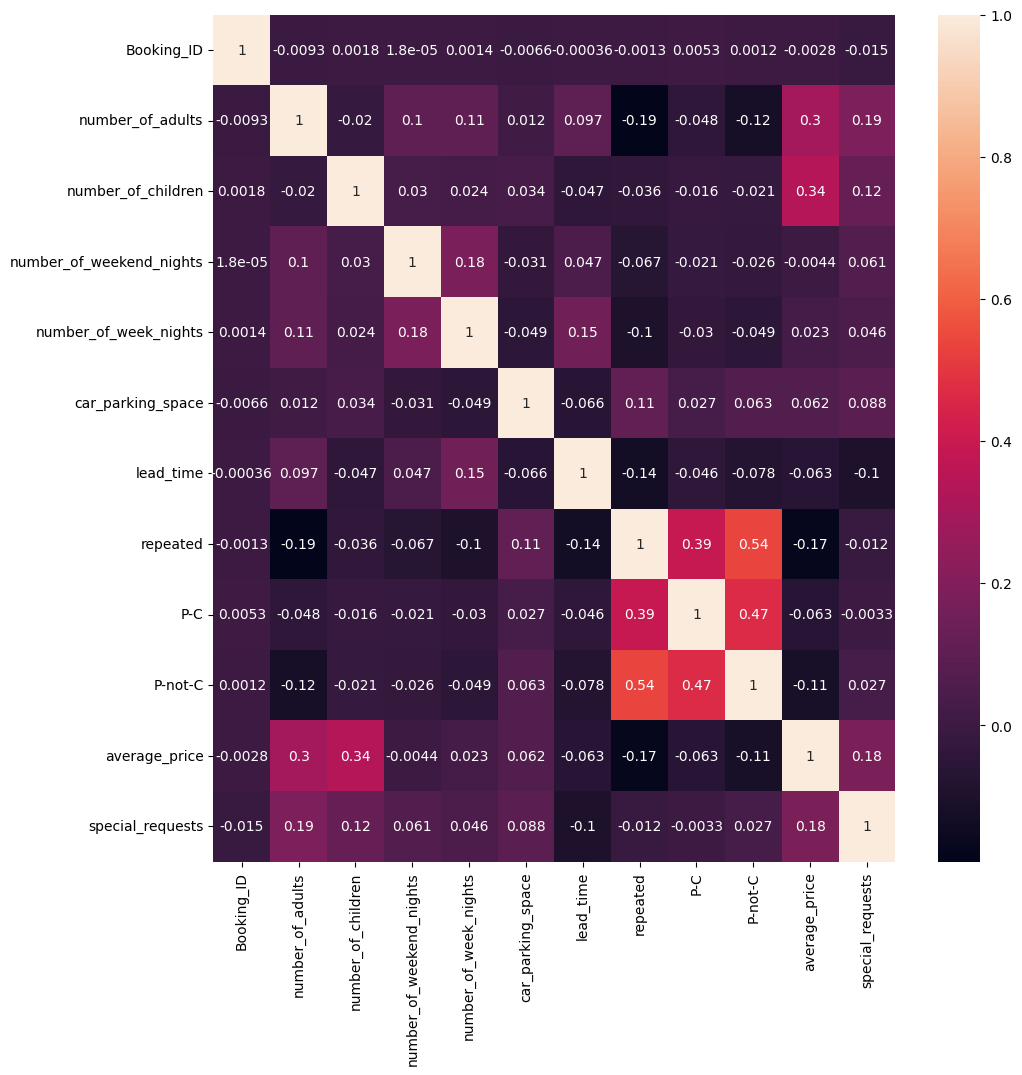

In [42]:
fig, ax = plt.subplots(figsize = (11,11))
sns.heatmap(booking_numeric.corr(), annot = True)

**Check the variable datatypes since all variables should be numeric to do Logistic Regression**

In [43]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36248 entries, 0 to 36247
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36248 non-null  int64  
 1   number_of_adults          36248 non-null  int64  
 2   number_of_children        36248 non-null  int64  
 3   number_of_weekend_nights  36248 non-null  int64  
 4   number_of_week_nights     36248 non-null  int64  
 5   type_of_meal              36248 non-null  object 
 6   car_parking_space         36248 non-null  int64  
 7   room_type                 36248 non-null  object 
 8   lead_time                 36248 non-null  int64  
 9   market_segment_type       36248 non-null  object 
 10  repeated                  36248 non-null  int64  
 11  P-C                       36248 non-null  int64  
 12  P-not-C                   36248 non-null  int64  
 13  average_price             36248 non-null  float64
 14  specia

**Convert the object data type variables into numeric/categorical data type**

In [44]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# type of meal variable to numeric datatype/categorical variable
le = preprocessing.LabelEncoder() # LabelEncoder function is used to transform the data type
le.fit(booking['type_of_meal']) # Need to fit the LabelEncoder function to the selected variable before transforming
booking['type_of_meal'] = le.transform(booking['type_of_meal']) # transform method is used to replace the categorical values with their corresponding encoded values
# Meal Plan 1 → 0
# Meal Plan 2 → 1
# Meal Plan 3 → 2
# Not Selected → 3

# room type variable to numeric datatype/categorical variable
le.fit(booking['room_type']) # Need to fit the LabelEncoder function to the selected variable before transforming
booking['room_type'] = le.transform(booking['room_type']) # transform method is used to replace the categorical values with their corresponding encoded values
# Room_Type 1 → 0
# Room_Type 2 → 1
# Room_Type 3 → 2
# Room_Type 4 → 3
# Room_Type 5 → 4
# Room_Type 6 → 5
# Room_Type 7 → 6

# market segment type variable to numeric datatype/categorical variable
le.fit(booking['market_segment_type']) # Need to fit the LabelEncoder function to the selected variable before transforming
booking['market_segment_type'] = le.transform(booking['market_segment_type']) # transform method is used to replace the categorical values with their corresponding encoded values
# Aviation → 0
# Complementary → 1
# Corporate → 2
# Offline → 3
# Online → 4

# booking status variable to numeric datatype/categorical variable
le.fit(booking['booking_status']) # Need to fit the LabelEncoder function to the selected variable before transforming
booking['booking_status'] = le.transform(booking['booking_status']) # transform method is used to replace the categorical values with their corresponding encoded values
# Not_Canceled → 1
# Canceled → 0

# convert the date of reservation to a datetime datatype variable and change it to day of the week field
booking['date_of_reservation'] = pd.to_datetime(booking['date_of_reservation'])
booking['date_of_reservation'] = booking['date_of_reservation'].dt.dayofweek # change the date to day of the week
booking.rename(columns={'date_of_reservation': 'day_of_reservation'}, inplace=True) # change the variable name

In [45]:
booking.head()

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,day_of_reservation,booking_status
0,1,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,4,1
1,2,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,1,1
2,3,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,2,0
3,4,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,5,0
4,5,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,2,0


In [46]:
booking.info() # now we have all fields in numeric datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36248 entries, 0 to 36247
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36248 non-null  int64  
 1   number_of_adults          36248 non-null  int64  
 2   number_of_children        36248 non-null  int64  
 3   number_of_weekend_nights  36248 non-null  int64  
 4   number_of_week_nights     36248 non-null  int64  
 5   type_of_meal              36248 non-null  int32  
 6   car_parking_space         36248 non-null  int64  
 7   room_type                 36248 non-null  int32  
 8   lead_time                 36248 non-null  int64  
 9   market_segment_type       36248 non-null  int32  
 10  repeated                  36248 non-null  int64  
 11  P-C                       36248 non-null  int64  
 12  P-not-C                   36248 non-null  int64  
 13  average_price             36248 non-null  float64
 14  specia

**Find if there are any Null values in the variables**

In [47]:
# Check if there is any NaN value inside the dataset
booking.isnull().sum()*100/booking.shape[0]

Booking_ID                  0.0
number_of_adults            0.0
number_of_children          0.0
number_of_weekend_nights    0.0
number_of_week_nights       0.0
type_of_meal                0.0
car_parking_space           0.0
room_type                   0.0
lead_time                   0.0
market_segment_type         0.0
repeated                    0.0
P-C                         0.0
P-not-C                     0.0
average_price               0.0
special_requests            0.0
day_of_reservation          0.0
booking_status              0.0
dtype: float64

**Outlier Analysis**

C:\Users\Sanjo George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Sanjo George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Sanjo George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Sanjo George\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be remo

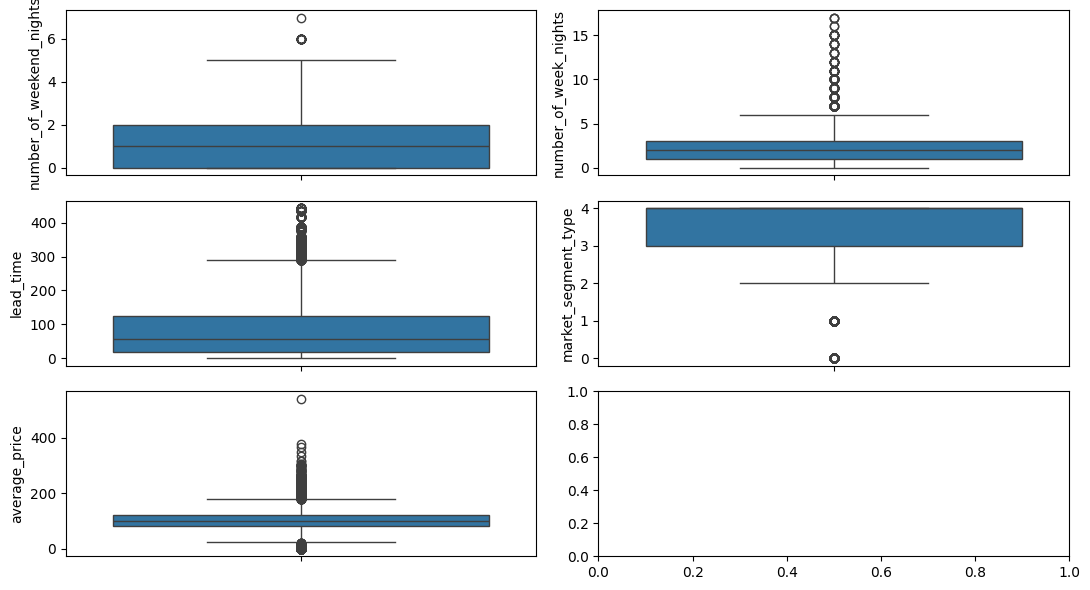

In [48]:
fig, axs = plt.subplots(3,2, figsize=(11,6))
plt1 = sns.boxplot(booking['number_of_weekend_nights'],ax = axs[0,0])
plt1 = sns.boxplot(booking['number_of_week_nights'],ax = axs[0,1])
plt1 = sns.boxplot(booking['lead_time'],ax = axs[1,0])
plt1 = sns.boxplot(booking['market_segment_type'],ax = axs[1,1])
plt1 = sns.boxplot(booking['average_price'],ax = axs[2,0])
plt.tight_layout()

**Logistic Regresssion**
****

Here we will be using the logistic regression to predict the probability of hotel bookings not getting cancelled.


Dependent variable booking_status denoted by y





*   booking not getting cancelled has a value 1 under booking_status
*   booking getting cancelled has a value 0 under booking_status









If probability of booking not getting cancelled is denoted as P(y=1) then the probability of booking getting cancelled is P(y=0) = 1 - P(y=1)



All other variables will be considered as independent variables denoted by x1, x2, x3 etc.

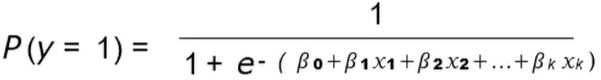

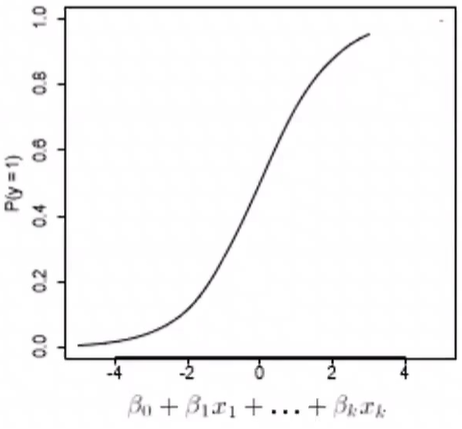

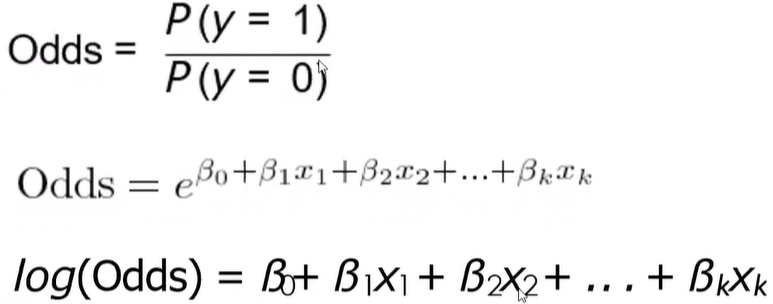

Logit --> log(Odds) is called the Logit and it looks like a linear regression.

The bigger the Logit is the bigger the P(y=1) will be.

**Build the independent and dependent variables and split the data into train and test data sets**

In [49]:
# build the independent and dependent variables
# here we are going to predict the booking_status which will become the dependent variable
# so we need to drop the booking_status variable and take everything else to independent variables

x = booking.drop(columns=['booking_status'])
# picks all variables except PoorCare
y = booking['booking_status']

# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3)

**Create the Logistic model**

In [50]:
import statsmodels.api as sm
logm1 = sm.Logit(y_train, (sm.add_constant(x_train)))
# this is how to create logistic model using the train dataset
# after adding a constant to the independent x variable
res = logm1.fit() # this is to fit the regression for the model
res.summary()

Optimization terminated successfully.
         Current function value: 0.440030
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25373
Model:                          Logit   Df Residuals:                    25356
Method:                           MLE   Df Model:                           16
Date:                Sun, 17 Mar 2024   Pseudo R-squ.:                  0.3046
Time:                        21:10:18   Log-Likelihood:                -11165.
converged:                       True   LL-Null:                       -16056.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        8.4230      0.176     47.833      0.000       8.078       8.768
Booking_ID               -4.802e-06   1.59e-06     -3.012      0.003   -7.93e-06   -1.68e-06
number_of_adults            -0.0230      0.036     -0.634      0.526      -0.094       0.048
number_of_children           0.0173      0.047      0.369      0.712      -0.074       0.109
number_of_weekend_nights    -0.1609      0.021     -7.502      0.000      -0.203      -0.119
number_of_week_nights       -0.0666      0.012     -5.394      0.000      -0.091      -0.042
type_of_meal                -0.0852      0.016     -5.214      0.000      -0.117      -0.053
car_parking_space            1.3890      0.131     10.589      0.000       1.132       1.646
room_type                    0.0863      0.015      5.655      0.000       0.056       0.116
lead_time                   -0.0140      0.000    -60.789      0.000      -0.014      -0.014
market_segment_type         -1.3044      0.042    -31.407      0.000      -1.386      -1.223
repeated                     1.6856      0.534      3.158      0.002       0.640       2.732
P-C                         -0.1583      0.088     -1.797      0.072      -0.331       0.014
P-not-C                      0.0212      0.077      0.276      0.783      -0.129       0.172
average_price               -0.0185      0.001    -27.968      0.000      -0.020      -0.017
special_requests             1.3749      0.029     48.186      0.000       1.319       1.431
day_of_reservation          -0.0110      0.009     -1.225      0.221      -0.029       0.007
============================================================================================
"""

**Making predictions on the test set**:

In [51]:
x_test = sm.add_constant(x_test) # constant to be added before doing modeling test dataset
x_test.head()

,const,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,day_of_reservation
28035,1.0,28066,2,0,0,1,0,0,0,22,3,0,0,0,75.00,0,0
32365,1.0,32401,2,1,1,1,1,0,0,145,4,0,0,0,177.75,0,0
20601,1.0,20627,1,0,1,0,0,0,0,3,4,0,0,0,105.00,0,2
19875,1.0,19900,2,0,1,2,0,0,3,121,4,0,0,0,114.30,0,2
6387,1.0,6392,2,0,0,2,1,0,0,39,3,0,0,0,101.50,0,0


In [52]:
y_test_pred = res.predict(x_test)
y_test_pred
#below are the predictions of the test set based on the train dataset in terms of probabilities

28035    0.928641
32365    0.068092
20601    0.714186
19875    0.308496
6387     0.856838
           ...   
26790    0.302679
18399    0.695634
30128    0.496254
13338    0.222412
19045    0.763359
Length: 10875, dtype: float64

In [53]:
# Convert the above predictions in to a dataframe
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred

,0
28035,0.928641
32365,0.068092
20601,0.714186
19875,0.308496
6387,0.856838
...,...
26790,0.302679
18399,0.695634
30128,0.496254
13338,0.222412


In [54]:
y_test

28035    1
32365    0
20601    1
19875    1
6387     1
        ..
26790    1
18399    1
30128    1
13338    1
19045    1
Name: booking_status, Length: 10875, dtype: int32

In [55]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,booking_status
28035,1
32365,0
20601,1
19875,1
6387,1
...,...
26790,1
18399,1
30128,1
13338,1


In [56]:
# Removing index for both dataframes to append  them side by side

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df,y_test_pred], axis=1)
y_pred_final.rename(columns={y_pred_final.columns[1]: "PredictedProb"}, inplace=True)
y_pred_final

,booking_status,PredictedProb
0,1,0.928641
1,0,0.068092
2,1,0.714186
3,1,0.308496
4,1,0.856838
...,...,...
10870,1,0.302679
10871,1,0.695634
10872,1,0.496254
10873,1,0.222412


**Threshold Value**

****

Threshold value is selected based on which errors are better to make the business decisions.

If this value is large then it will predict the bookings not getting cancelled rarely. But if the value is small then it will predict the bookings getting cancelled rarely.

With no preference between the errors we can select  the threshold value t = 0.5 that can predict the more likely outcome.

In [57]:
y_pred_final['final_predicted'] = y_pred_final.PredictedProb.map(lambda x: 1 if x>0.5 else 0)
y_pred_final

,booking_status,PredictedProb,final_predicted
0,1,0.928641,1
1,0,0.068092,0
2,1,0.714186,1
3,1,0.308496,0
4,1,0.856838,1
...,...,...,...
10870,1,0.302679,0
10871,1,0.695634,1
10872,1,0.496254,0
10873,1,0.222412,0


**Confusion Matrix**


A confusion matrix represents the prediction summary in matrix form. It shows how many prediction are correct and incorrect per class. It helps in understanding the classes that are being confused by model as other class.

In [58]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_pred_final.booking_status, y_pred_final.final_predicted)
confusion

array([[2151, 1407],
       [ 745, 6572]], dtype=int64)

**Sensitivity, Specificity and Accuracy**

Sensitivity (true positive rate) is the probability of a positive test result, conditioned on the individual truly being positive.


Specificity (true negative rate) is the probability of a negative test result, conditioned on the individual truly being negative.

In [59]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative
print("Sensitivity =",TP / float(TP+FN))
print("Specificity =",TN / float(TN+FP))

overall_accuracy = (TP+TN) / (TP+TN+FP+FN)
print("Overall Accuracy =", overall_accuracy)

Sensitivity = 0.898182315156485
Specificity = 0.6045531197301856
Overall Accuracy = 0.8021149425287356


**ROC Curve - Receiver Operating Characteristic Curve**

In [60]:
# ROC Curve - Receiver Operating Characteristic Curve
# It is a graph showing the performance of a classification model at all classification thresholds.
import sklearn.metrics as metrics
def draw_roc(actual, probs):
  fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
  # fpr = False Positive Rate, tpr = True Positive Rate
  auc_score = metrics.roc_auc_score(actual, probs)
  plt.figure(figsize = (5,5))
  plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

  return None

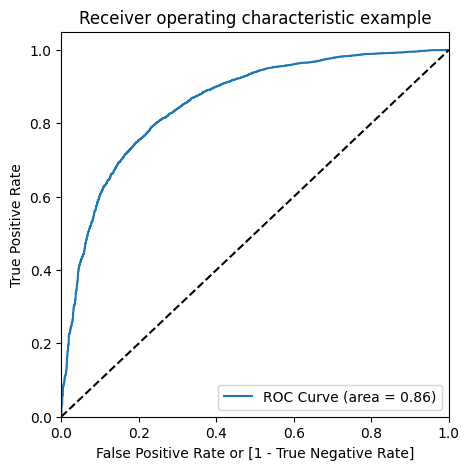

In [61]:
draw_roc(y_pred_final.booking_status, y_pred_final.PredictedProb)

**Area Under the ROC Curve (AUC)**
****

The Area Under the ROC Curve can predict how well the predictions can be made using the given model. Hence AUC = 1 means the model gives perfect prediction of the dependent variable but if the AUC is under 0.5 then the prediction will be more of guessing and the model wont add any value to the business deicions. In the above model we have an AUC of 0.86 which is a very good value and it points to the effectiveness of how perfectly our model can predit the hotel bookings that will not get cancelled.

**Business Conclusions**



---



The hotel industry can make use of our model to make predictions with about 86% perfection in predicting if the hotel booking will not get cancelled based on which they can make decisions in advance such as



1.   Over booking: Based on the predicted booking cancellations the hotel can increase or decrease the percentage of over booking and this increase their revenue and customer satisfaction.
2.   Control Human Resource: Hotels will have a better control on their staffing requirement based on this prediction and cut cost in case of more booking cancellations.
3.   Inventory Control: Hotel will be in a better position to make decisions in advance on their inventory and supply stocks.
4.   Focused Advertising and promotions: Using this model Hotels can focus on targeted advertising to customers who are more likely not to cancel their booking.
5.   Control on Payments: Hotels will have a better control over the incoming and outgoing payments there by ensure financial security and stability of their assets.